In [9]:
import numpy as np
import matplotlib.pyplot as plt

from rikabtools.plot_utils import cmaps
from labellines import labelLine, labelLines

In [10]:
# ##### CONFIG FILE #####

config = np.load(f"experiments/Lead/cross_sections/config_{5000}.npy", allow_pickle=True)[()]


# ##### PARAMETERS #####
E_0 = config["E_0"]
m_lepton = config["Lepton Mass"]
theta_max = config["theta_max"]
x_max = 1 - m_lepton / E_0

xbins = config["xbins"]
xs = np.linspace(0, 1, xbins)

m_Xs = np.array(config["m_X"])

target_name = config["Target Name"]

# Options
run_IWW = config["IWW"]
run_WW = config["WW"]
cross_section_directory = config["Cross Sections Directory"]
cross_section_file = config["Cross Sections File"]


if run_IWW:
        cross_section_dict = np.load(f"{cross_section_file}.npy", allow_pickle=True)[()]
if run_WW:
        cross_section_dict = np.load(f"{cross_section_file}_WW.npy", allow_pickle=True)[()]

# Constants
m_mu = 0.105
m_e = 0.000511
m_tau = 1.776
m_p = 0.937
alpha_EM = 1.0/137

cases = ["Scalar", "Pseudoscalar", "Vector", "Axial Vector"]
colors = ["red", "yellow", "green", "blue", "magenta"]


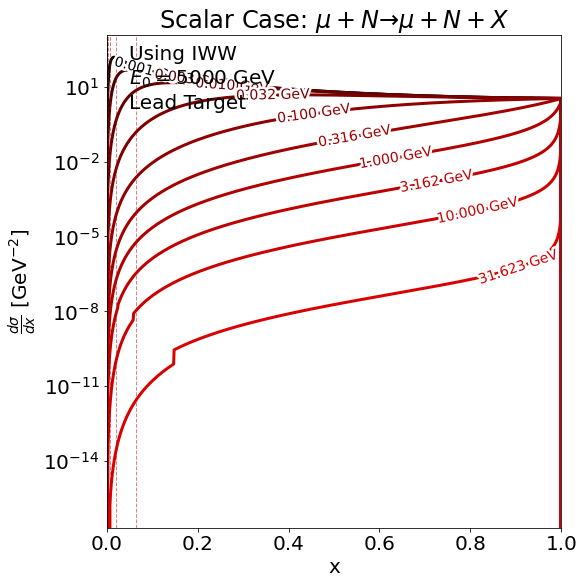

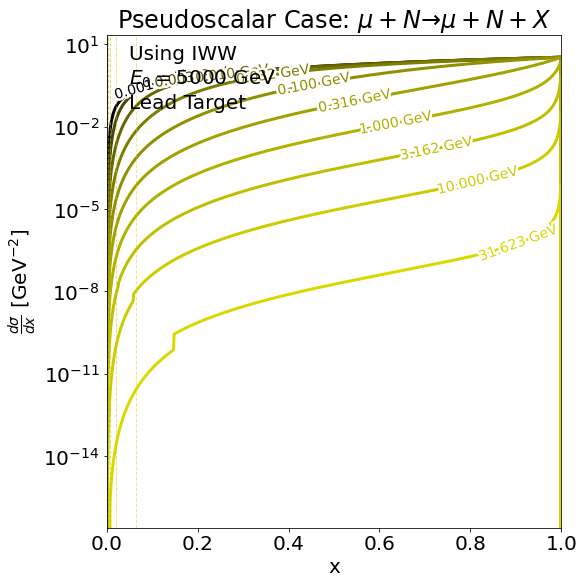

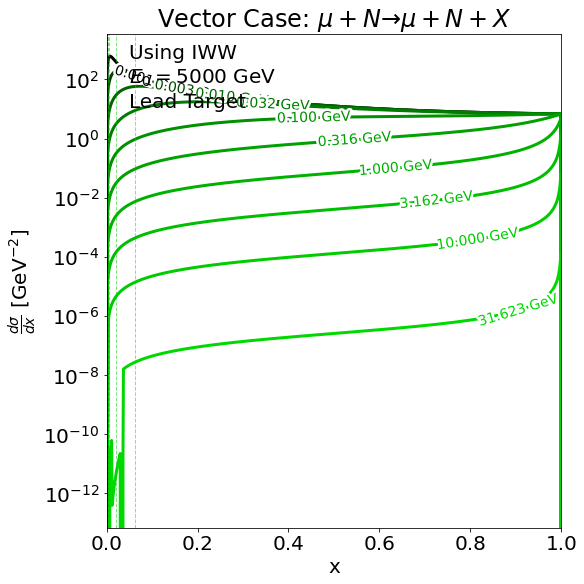

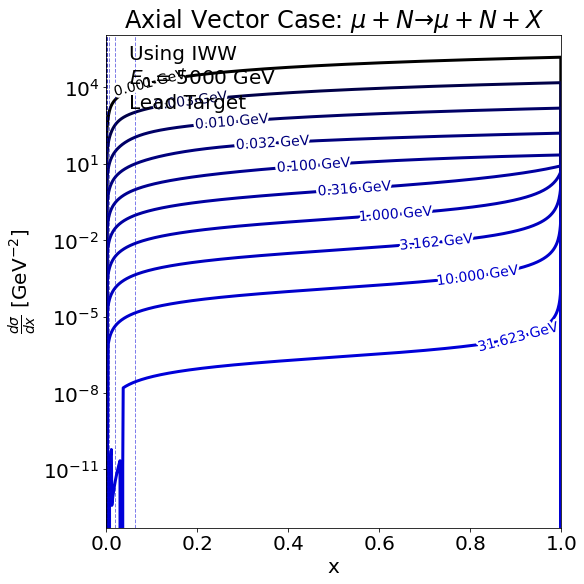

In [11]:


m_X_indices = range(25)

for (c,case) in enumerate(cases):

    plt.rcParams.update({'font.size': 20})
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

    for (i, m_X) in enumerate(m_Xs[m_Xs < 100]):

        if i in m_X_indices and i%2 == 0:

            dsigma_dx_normalized = cross_section_dict[case][i] #/ np.nansum(cross_section_dict[case][i]/ xbins) 
            plt.plot(xs,  dsigma_dx_normalized, label = f"{m_X:.3f} GeV", color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 3)

            # WW Version
            if run_WW:
                dsigma_dx_normalized = cross_section_dict_WW[case][i] #/ np.nansum(cross_section_dict_WW[case][i]/ xbins) 
                plt.plot(xs,  dsigma_dx_normalized, color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 3, ls = "--", alpha = 0.5)


    
    if not run_WW:
        plt.text(0.05, 1.00 - 0.05*1, r"Using IWW", fontsize = 20, transform = plt.gca().transAxes,)
    else:
        plt.text(0.05, 1.00 - 0.05*1, r"IWW (Solid) and WW (Dashed)", fontsize = 20, transform = plt.gca().transAxes,)
    plt.text(0.05, 1.00 - 0.05*2, r"$E_0 = %d$ GeV" % E_0, fontsize = 20, transform = plt.gca().transAxes,)
    plt.text(0.05, 1.00 - 0.05*3, f"{target_name} Target", fontsize = 20, transform = plt.gca().transAxes,)
    labelLines(ax.get_lines(), zorder=2.5, fontsize = 14)

    for (i, m_X) in enumerate(m_Xs[m_Xs < 100]):

        if i in m_X_indices and i%2 == 0:

            x_star = 10 * m_X / E_0 
            plt.axvline(x_star, color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 1, alpha = 0.5, ls = "--")


    plt.yscale("log")
    plt.xlim([0, 1])
    # plt.ylim([0.01, 100])
    plt.xlabel("x")
    plt.title(f"{case} Case: " + r"$\mu+N \to \mu+N+X$")
    plt.ylabel(r"$\frac{d\sigma}{dx}$ [GeV$^{-2}$]")
    # plt.savefig(f"tex/Figures/{case}.pdf", transparent = False)
    # plt.legend(title = f"{case} Mass $m_X$")

In [12]:
# for (c,case) in enumerate(cases):

#     plt.rcParams.update({'font.size': 20})
#     fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

#     for (i, m_X) in enumerate(m_Xs[m_Xs < E_0]):

#         if i in m_X_indices:

#             dsigma_dx_normalized = cross_section_dict[case][i] 
#             # plt.plot(xs,  dsigma_dx_normalized, label = f"{m_X:.3f} GeV", color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 3)

#             # WW Version
#             dsigma_dx_normalized_WW = cross_section_dict_WW[case][i] 
#             plt.plot(xs,  (dsigma_dx_normalized - dsigma_dx_normalized_WW) / dsigma_dx_normalized_WW, color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 3, label = f"{m_X} GeV")


    
#     # plt.text(0.05, 1.00 - 0.05*1, r"IWW (Solid) and WW (Dashed)", fontsize = 20, transform = plt.gca().transAxes,)
#     plt.text(0.05, 1.00 - 0.05*2, r"$E_0 = %d$ GeV" % E_0, fontsize = 20, transform = plt.gca().transAxes,)
#     labelLines(ax.get_lines(), zorder=2.5, fontsize = 14)

#     plt.axhline(0, color = "black", lw = 1)


#     for (i, m_X) in enumerate(m_Xs[m_Xs < 10000]):

#         if i in m_X_indices:

#             x_star = 100 * m_X / E_0 


#     # plt.yscale("log")
#     plt.xlim([0, 1])
#     plt.ylim([-1, 10])
#     plt.xlabel("x")
#     plt.title(f"{case} Case: " + r"$\mu+N \to \mu+N+X$")
#     plt.ylabel(r"Ratio of IWW / WW$")
#     # plt.savefig(f"tex/Figures/{case}.pdf", transparent = False)
#     # plt.legend(title = f"{case} Mass $m_X$")

Scalar 56.23413251903491 1.1246826503806981
56.23413251903491
Pseudoscalar 56.23413251903491 1.1246826503806981
56.23413251903491
Vector 31.622776601683793 0.09576707880519952 0.6324555320336758
31.622776601683793
Axial Vector 31.622776601683793 0.09576287083346267 0.6324555320336758
31.622776601683793


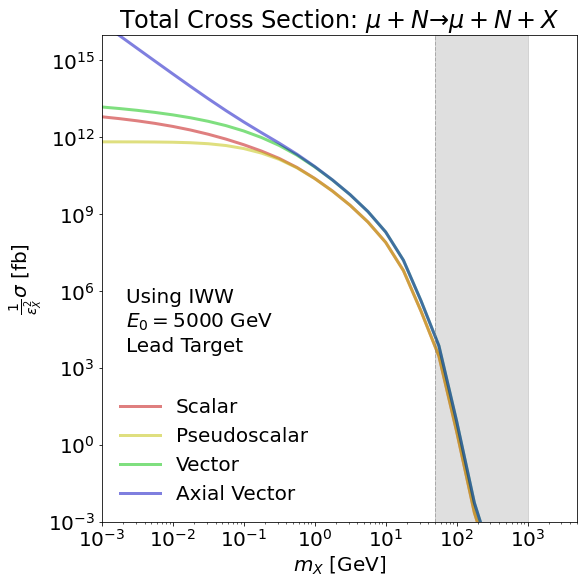

In [13]:
# Total cross sections

geV2_to_mb = 0.389
mb_to_fb = 1e12

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

for (c,case) in enumerate(cases):


    # Calculate the highest mass for which 95% of cross section has a boost factor > 100
    mass_cross_sections = mb_to_fb * geV2_to_mb * np.array([np.nansum(cross_section_dict[case][i]/ xbins) for (i, m_X) in enumerate(m_Xs[m_Xs < E_0])])
    cumulative_sum = np.array([np.cumsum(cross_section_dict[case][i]/ xbins / mass_cross_sections[i] * (mb_to_fb * geV2_to_mb)) for (i, m_X) in enumerate(m_Xs[m_Xs < E_0])])
    critical_mass = 1e3

   

    for (i, m_X) in enumerate(m_Xs[m_Xs < E_0]):

        x_star = 100 * m_X / E_0 
        x_star_index = int(x_star * xbins)

        if x_star_index >= xbins:
            print(case, m_X, x_star)
            critical_mass = m_X
            break

        if cumulative_sum[i][x_star_index] < 1- 0.950:
            pass
        else:
            critical_mass = m_X
            print(case, m_X, cumulative_sum[i][x_star_index], x_star)
            break


        critical_cumulative_sum = cumulative_sum[i][x_star_index]
        pre_critical_mass = m_Xs[i -1]

    plt.plot(m_Xs[m_Xs < E_0], mass_cross_sections, color = cmaps[colors[c]](0.75), lw = 3, label = case, alpha = 0.5)
    if run_WW:
        mass_cross_sections_WW = mb_to_fb * geV2_to_mb * np.array([np.nansum(cross_section_dict_WW[case][i]/ xbins) for (i, m_X) in enumerate(m_Xs[m_Xs < E_0])])
        cumulative_sum_WW = np.array([np.cumsum(cross_section_dict_WW[case][i]/ xbins / mass_cross_sections_WW[i] * (mb_to_fb * geV2_to_mb)) for (i, m_X) in enumerate(m_Xs[m_Xs < E_0])])

        plt.plot(m_Xs[m_Xs < E_0], mass_cross_sections_WW, color = cmaps[colors[c]](0.75), lw = 3, alpha = 0.5, ls = "--")
    print(critical_mass)
    # for (i, m_X) in enumerate(m_Xs[m_Xs < E_0]):

    #     dsigma_dx_normalized = cross_section_dict[case][i] / np.nansum(cross_section_dict[case][i]/ xbins) 
    #     plt.plot(xs,  dsigma_dx_normalized, label = f"{m_X} GeV", color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 3)

    
    # plt.text(0.05, 1.00 - 0.05*1, r"Using IWW", fontsize = 20, transform = plt.gca().transAxes,)
    # plt.text(0.05, 1.00 - 0.05*2, r"$E_0 = %d$ GeV" % E_0, fontsize = 20, transform = plt.gca().transAxes,)

    # for (i, m_X) in enumerate(m_Xs[m_Xs < E_0]):

    #     x_star = 100 * m_X / E_0 
    #     plt.axvline(x_star, color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 1, alpha = 0.5, ls = "--")





ax.fill_between(np.logspace(-3, 3, 500), 1e-12, 1e18, where = np.logspace(-3, 3, 500) > E_0 / 100, color = "grey", alpha = 0.25)
plt.axvline(E_0  / 100, color = "grey", lw = 1, alpha = 0.5, ls = "--")


plt.yscale("log")
plt.xscale("log")

# labelLines(ax.get_lines(), zorder=2.5, fontsize = 14)


# plt.xlim([0, 1])
plt.ylim([1e-3, 1e16])
plt.xlim([1e-3, E_0])
plt.xlabel("$m_X$ [GeV]")
plt.title(f"Total Cross Section: " + r"$\mu+N \to \mu+N+X$")
plt.ylabel(r"$\frac{1}{\epsilon_X^2}\sigma$ [fb]")

plt.text(0.05, 0.5 - 0.05*1, r"Using IWW", fontsize = 20, transform = plt.gca().transAxes,)
plt.text(0.05, 0.5 - 0.05*2, r"$E_0 = %d$ GeV" % E_0, fontsize = 20, transform = plt.gca().transAxes,)
plt.text(0.05, 0.5 - 0.05*3, f"{target_name} Target", fontsize = 20, transform = plt.gca().transAxes,)

# labelLines(ax.get_lines(), zorder=2.5, fontsize = 14)


plt.legend(frameon = False)


# plt.savefig(f"tex/Figures/Integrated_Cross_Sections.pdf", transparent = False)
# plt.legend(title = f"{case} Mass $m_X$")

In [14]:
# from rikabtools.plot_utils import cmaps
# from labellines import labelLine, labelLines



# for (c,case) in enumerate(cases):

#     plt.rcParams.update({'font.size': 20})
#     fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

#     for (i, m_X) in enumerate(m_Xs[m_Xs < E_0]):
        

#         dsigma_dx_normalized = mb_to_fb * geV2_to_mb * cross_section_dict[case][i] 
#         plt.plot(xs,  dsigma_dx_normalized, label = f"{m_X} GeV", color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 3)

    
#     plt.text(0.05, .5 - 0.05*1, r"Using IWW", fontsize = 20, transform = plt.gca().transAxes,)
#     plt.text(0.05, .5 - 0.05*2, r"$E_0 = %d$ GeV" % E_0, fontsize = 20, transform = plt.gca().transAxes,)
#     labelLines(ax.get_lines(), zorder=2.5, fontsize = 14)

#     for (i, m_X) in enumerate(m_Xs[m_Xs < E_0]):

#         x_star = 100 * m_X / E_0 
#         plt.axvline(x_star, color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 1, alpha = 0.5, ls = "--")


#     plt.yscale("log")
#     plt.xlim([0, 1])
#     plt.ylim([1e-12, 1e18])
#     plt.xlabel("x")
#     plt.title(f"{case} Case: " + r"$\mu+N \to \mu+N+A$")
#     plt.ylabel(r"$\frac{1}{\epsilon^2}\frac{d\sigma}{dx}$ [fb]")
#     # plt.savefig(f"{case}.")
#     # plt.legend(title = f"{case} Mass $m_X$")

20249.245243309386


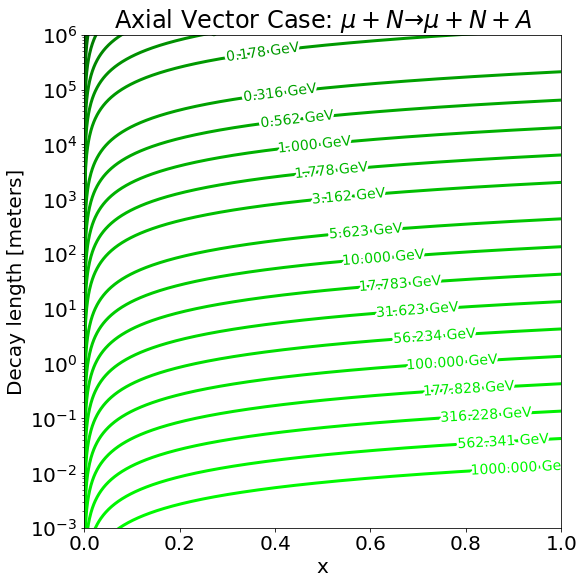

In [15]:
def scalar_decay_width(m_X, epsilon, m_l):

    if m_X <= 2  *m_l:
        return 0

    prefactor = epsilon**2 * alpha_EM / 2
    kinematic_factor = m_X * np.sqrt(1 - 4 * m_l**2 / m_X**2)**3
    return prefactor * kinematic_factor


def vector_decay_width(m_X, epsilon, m_l):

    if m_X <= 2  *m_l:
        return 0

    prefactor = epsilon**2 * alpha_EM / 3
    kinematic_factor = m_X * (1 + 2*m_l**2 / m_X**2) * np.sqrt(1 - 4 * m_l**2 / m_X**2)
    return prefactor * kinematic_factor

def decay_length(decay_width, x, m_X, epsilon):

    hbarc = .197 # GeV fm
    gamma = (x * E_0) / m_X


    total_decay_width = decay_width(m_X, epsilon, m_e) + decay_width(m_X, epsilon, m_mu) + decay_width(m_X, epsilon, 1.776)
    return 1e-15 * hbarc * gamma / total_decay_width



plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))


for (i, m_X) in enumerate(m_Xs[m_Xs < E_0]):

    if m_X > 2 * m_e:
        c = 2
        epsilon_0 = 1e-7
        decay_lengths = []
        for x in xs:
            decay_lengths.append(decay_length(vector_decay_width, x, m_X, epsilon_0))
        plt.plot(xs,  decay_lengths, label = f"{m_X:.3f} GeV", color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 3)


plt.yscale("log")
plt.xlim([0, 1])
plt.ylim([1e-3, 1e6])
plt.xlabel("x")
plt.title(f"{case} Case: " + r"$\mu+N \to \mu+N+A$")
plt.ylabel(r"Decay length [meters]")

labelLines(ax.get_lines(), zorder=2.5, fontsize = 14)


print(decay_length(vector_decay_width, x = 1.0, m_X =  1.0, epsilon = 1e-7))



# Notes
* Things go horribly wrong (for the scalar case) when the A mass is much less than the lepton mass

/tmp/ipykernel_16652/240762236.py:7: RuntimeWarning: divide by zero encountered in true_divide
  U = m_X**2 * (1-x) / x + m_mu**2 * x
/tmp/ipykernel_16652/240762236.py:12: RuntimeWarning: divide by zero encountered in true_divide
  u_max = -m_X**2 * (1-x) / x - m_mu**2 * x
/tmp/ipykernel_16652/240762236.py:15: RuntimeWarning: invalid value encountered in multiply
  term3 = (u_max*x * 3 / 2) + m_X**2 * (1-x) + m_mu**2 * x**2
/tmp/ipykernel_16652/240762236.py:29: RuntimeWarning: divide by zero encountered in true_divide
  U = m_X**2 * (1-x) / x + m_mu**2 * x


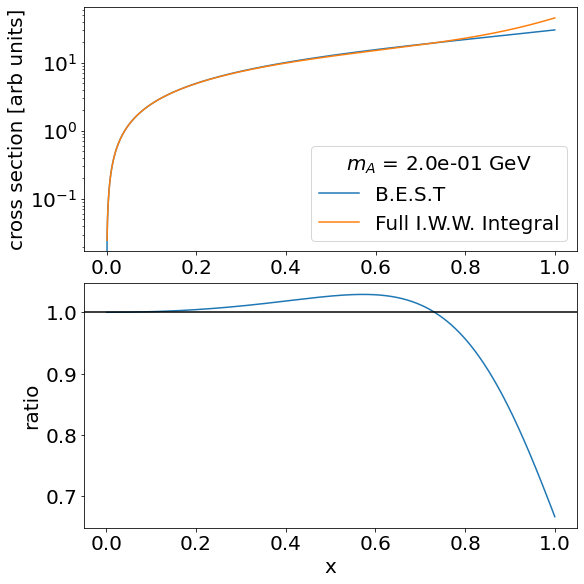

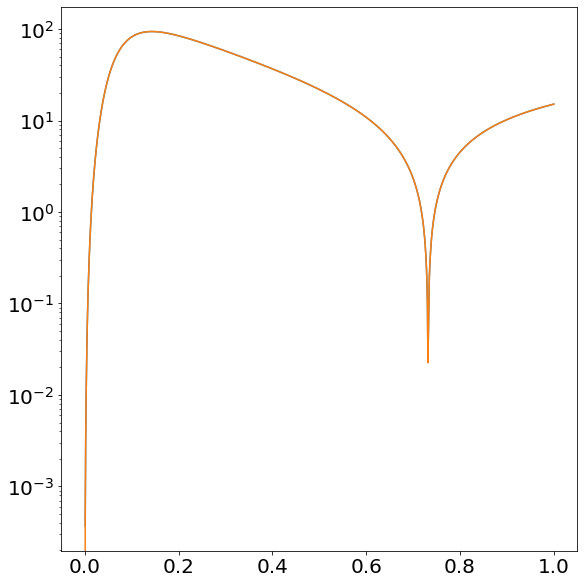

In [16]:
# Thing that is sus in BEST

# After checking: it actually was sus, approximation is bad for m_X << m_mu

def best_2nd_term(x, m_X):

    U = m_X**2 * (1-x) / x + m_mu**2 * x
    return  (1 - x + x**2 / 2) / U  - (x**2 / U / 6)

def integrated_2nd_term(x, m_X):

    u_max = -m_X**2 * (1-x) / x - m_mu**2 * x

    term2 = -(m_X**2 + 2 * m_mu**2) / u_max**3 / 3
    term3 = (u_max*x * 3 / 2) + m_X**2 * (1-x) + m_mu**2 * x**2 

    return (1 - x + x**2 / 2) / (-1 * u_max) + (term2 * term3 * (1-x))

def error(x, m_X):

    aa = best_2nd_term(x, m_X)
    bb = integrated_2nd_term(x, m_X)

    return  np.abs(aa-bb) 


def difference(x, m_X):

    U = m_X**2 * (1-x) / x + m_mu**2 * x
    return m_mu**2 *(  x**3  - 2 * x * (1-x)) / U**2 / 6


plt.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(8, 8))
axes[0].plot(xs, np.abs(best_2nd_term(xs, 0.201)), label = "B.E.S.T")
axes[0].plot(xs, np.abs(integrated_2nd_term(xs, 0.201)), label = "Full I.W.W. Integral")
axes[0].set_yscale('log')
axes[0].legend(title = r"$m_{A}$ = %.1e GeV" % 0.201)
axes[0].set_ylabel("cross section [arb units]")
# plt.plot(xs, np.abs(integrated_2nd_term(xs, 0.01)) - np.abs(difference(x, m_X)))

axes[1].plot(xs, np.abs(best_2nd_term(xs, 0.201)) / np.abs(integrated_2nd_term(xs, 0.201)))
axes[1].set_ylabel("ratio")
axes[1].axhline(1.0, color = "black")


plt.xlabel("x")


plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))
plt.plot(xs, error(xs, 0.01))
plt.plot(xs, np.abs(difference(xs, 0.01)))
plt.yscale('log')